In [1]:
#import the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder


In [2]:
#upload the csv file
df=pd.read_csv('vehicle.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [3]:
#preprocessing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [4]:
#convert float,object into numeric

df['mileage(km/ltr/kg)']=pd.to_numeric(df['mileage(km/ltr/kg)'],errors='coerce')
df['engine']=pd.to_numeric(df['engine'],errors='coerce')
df['max_power']=pd.to_numeric(df['max_power'],errors='coerce')
df['seats']=pd.to_numeric(df['seats'],errors='coerce')

In [5]:
#to fill the space used median
df['mileage(km/ltr/kg)']=df['mileage(km/ltr/kg)'].fillna(df['mileage(km/ltr/kg)'].median())
df['engine']=df['engine'].fillna(df['engine'].median())
df['max_power']=df['max_power'].fillna(df['max_power'].median())
df['seats']=df['seats'].fillna(df['seats'].median())


In [6]:
df.info() #no null empty space

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  8128 non-null   float64
 9   engine              8128 non-null   float64
 10  max_power           8128 non-null   float64
 11  seats               8128 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [7]:
print(df.isnull().sum())

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64


In [8]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [9]:
df['seller_type'].value_counts()

seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64

In [10]:
#to find the variant ,model,make 
df = pd.read_csv('vehicle.csv')  # Make sure .csv is in the same directory or provide full path

# Function to extract make, model, and variant
def extract_make_model_variant(name):
    if pd.isna(name):  # handle missing names
        return pd.Series(['', '', ''])

    parts = name.split()
    make = parts[0] if len(parts) > 0 else ''

    # Build model until a likely variant starts
    model = ""
    variant_start = 1
    for i in range(1, len(parts)):
        if parts[i].isupper() or parts[i][0].isdigit():
            break
        model += " " + parts[i]
        variant_start = i + 1

    model = model.strip()
    variant = " ".join(parts[variant_start:])

    return pd.Series([make, model, variant])

# Apply function to extract details
df[['make', 'model', 'variant']] = df['name'].apply(extract_make_model_variant)

# Final DataFrame with new columns
df

# Print result
# print(car_detail)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,make,model,variant
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,Maruti,Swift Dzire,VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,Rapid,1.5 TDI Ambition
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,Honda,City,2017-2020 EXi
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,Hyundai,i20 Sportz Diesel,
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,Maruti,Swift,VXI BSIII
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,Hyundai,i20 Magna,
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0,Hyundai,Verna CRDi,SX
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0,Maruti,Swift Dzire ZDi,
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0,Tata,Indigo,CR4


In [11]:
#convert float,object into numeric

df['mileage(km/ltr/kg)']=pd.to_numeric(df['mileage(km/ltr/kg)'],errors='coerce')
df['engine']=pd.to_numeric(df['engine'],errors='coerce')
df['max_power']=pd.to_numeric(df['max_power'],errors='coerce')
df['seats']=pd.to_numeric(df['seats'],errors='coerce')

In [12]:
#to fill the space used median
df['mileage(km/ltr/kg)']=df['mileage(km/ltr/kg)'].fillna(df['mileage(km/ltr/kg)'].median())
df['engine']=df['engine'].fillna(df['engine'].median())
df['max_power']=df['max_power'].fillna(df['max_power'].median())
df['seats']=df['seats'].fillna(df['seats'].median())

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  8128 non-null   float64
 9   engine              8128 non-null   float64
 10  max_power           8128 non-null   float64
 11  seats               8128 non-null   float64
 12  make                8128 non-null   object 
 13  model               8128 non-null   object 
 14  variant             8128 non-null   object 
dtypes: float64(4), int64(3), object(8)
memory usage: 952.6+

In [14]:
df=pd.get_dummies(df,columns=['fuel','seller_type','transmission','owner'],drop_first=True)
df

,name,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,make,model,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,23.40,1248.0,74.00,5.0,Maruti,Swift Dzire,...,True,False,False,True,False,True,False,False,False,False
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.14,1498.0,103.52,5.0,Skoda,Rapid,...,True,False,False,True,False,True,False,True,False,False
2,Honda City 2017-2020 EXi,2006,158000,140000,17.70,1497.0,78.00,5.0,Honda,City,...,False,False,True,True,False,True,False,False,False,True
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.00,1396.0,90.00,5.0,Hyundai,i20 Sportz Diesel,...,True,False,False,True,False,True,False,False,False,False
4,Maruti Swift VXI BSIII,2007,130000,120000,16.10,1298.0,88.20,5.0,Maruti,Swift,...,False,False,True,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,18.50,1197.0,82.85,5.0,Hyundai,i20 Magna,...,False,False,True,True,False,True,False,False,False,False
8124,Hyundai Verna CRDi SX,2007,135000,119000,16.80,1493.0,110.00,5.0,Hyundai,Verna CRDi,...,True,False,False,True,False,True,True,False,False,False
8125,Maruti Swift Dzire ZDi,2009,382000,120000,19.30,1248.0,73.90,5.0,Maruti,Swift Dzire ZDi,...,True,False,False,True,False,True,False,False,False,False
8126,Tata Indigo CR4,2013,290000,25000,23.57,1396.0,70.00,5.0,Tata,Indigo,...,True,False,False,True,False,True,False,False,False,False


In [15]:
df.shape

(8128, 21)

In [16]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.00000,8128.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.415554,1452.89813,91.264982,5.405389
std,4.044249,8.062534e+05,5.655055e+04,3.981922,498.19672,35.376388,0.948874
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.00000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.800000,1197.00000,68.100000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.00000,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.277500,1582.00000,101.250000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.00000,400.000000,14.000000


In [17]:
#to convert the categorical (names of make,model ,variant) into the numerical value
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['make']=le.fit_transform(df['make'])
df['model']=le.fit_transform(df['model'])
df['variant']=le.fit_transform(df['variant'])

In [18]:
#drop the name column
df=df.drop(columns=['name'])
df

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,make,model,variant,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,23.40,1248.0,74.00,5.0,20,357,1400,True,False,False,True,False,True,False,False,False,False
1,2014,370000,120000,21.14,1498.0,103.52,5.0,27,299,328,True,False,False,True,False,True,False,True,False,False
2,2006,158000,140000,17.70,1497.0,78.00,5.0,10,73,626,False,False,True,True,False,True,False,False,False,True
3,2010,225000,127000,23.00,1396.0,90.00,5.0,11,457,0,True,False,False,True,False,True,False,False,False,False
4,2007,130000,120000,16.10,1298.0,88.20,5.0,20,355,1460,False,False,True,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,18.50,1197.0,82.85,5.0,11,453,0,False,False,True,True,False,True,False,False,False,False
8124,2007,135000,119000,16.80,1493.0,110.00,5.0,11,403,1306,True,False,False,True,False,True,True,False,False,False
8125,2009,382000,120000,19.30,1248.0,73.90,5.0,20,365,0,True,False,False,True,False,True,False,False,False,False
8126,2013,290000,25000,23.57,1396.0,70.00,5.0,28,204,845,True,False,False,True,False,True,False,False,False,False


D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


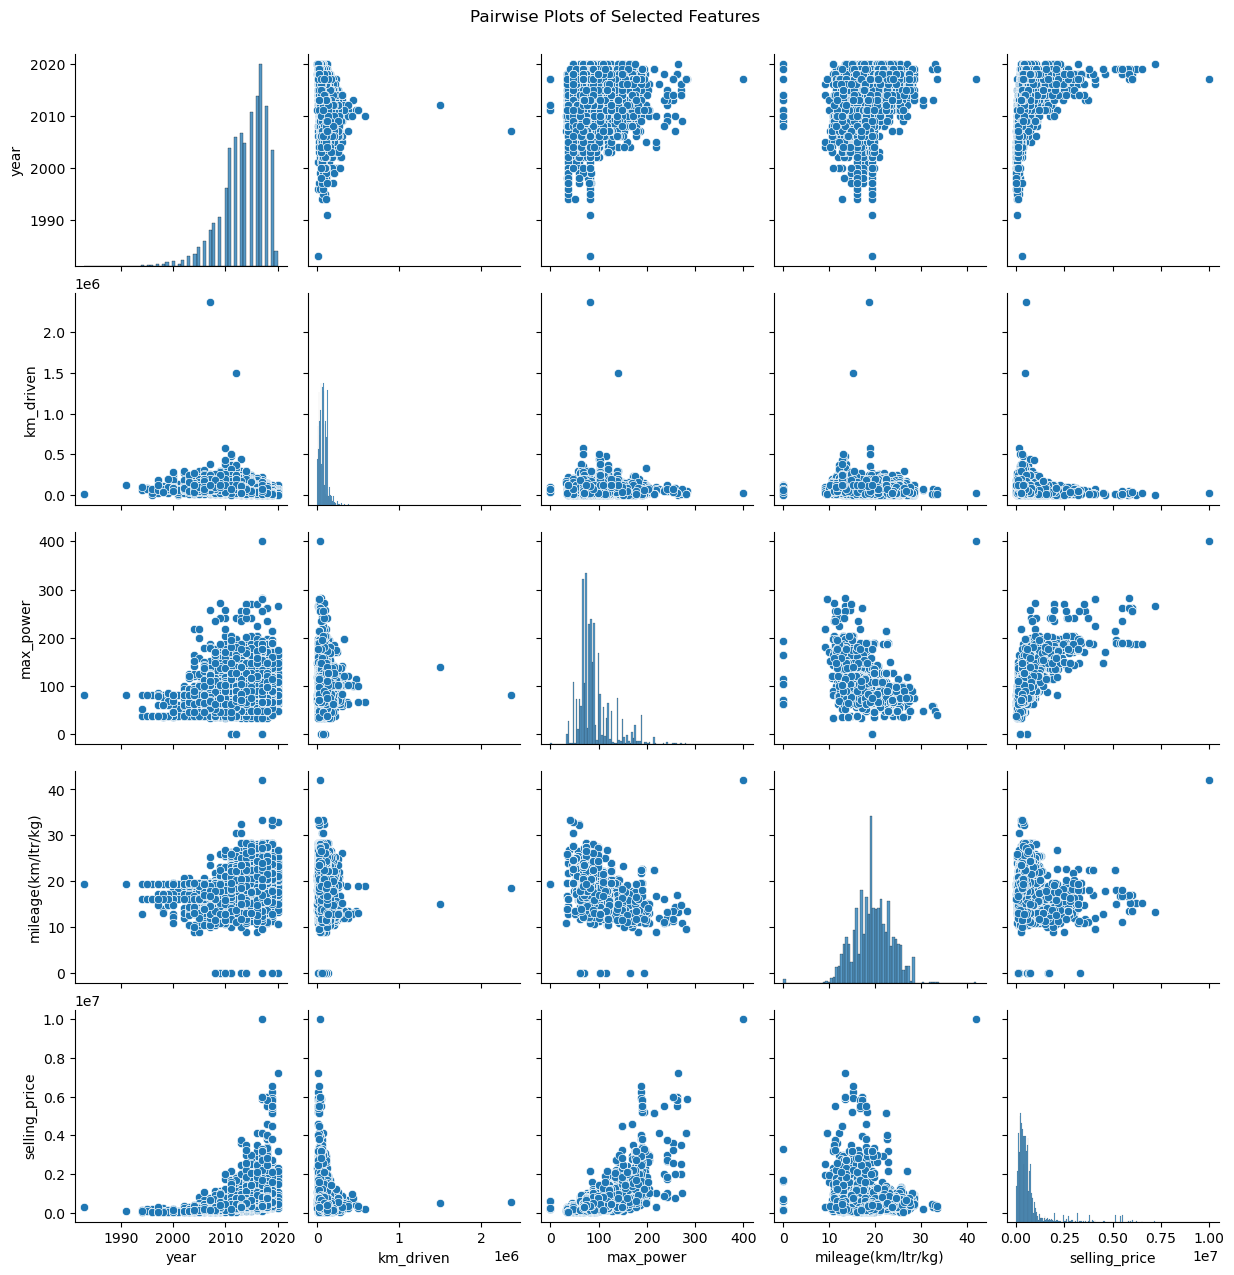

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df[['year','km_driven','max_power','mileage(km/ltr/kg)','selling_price']])
plt.suptitle("Pairwise Plots of Selected Features",y=1.02)
plt.show()

In [20]:
x=df.drop(columns=['selling_price'],axis=1)
y=df['selling_price']

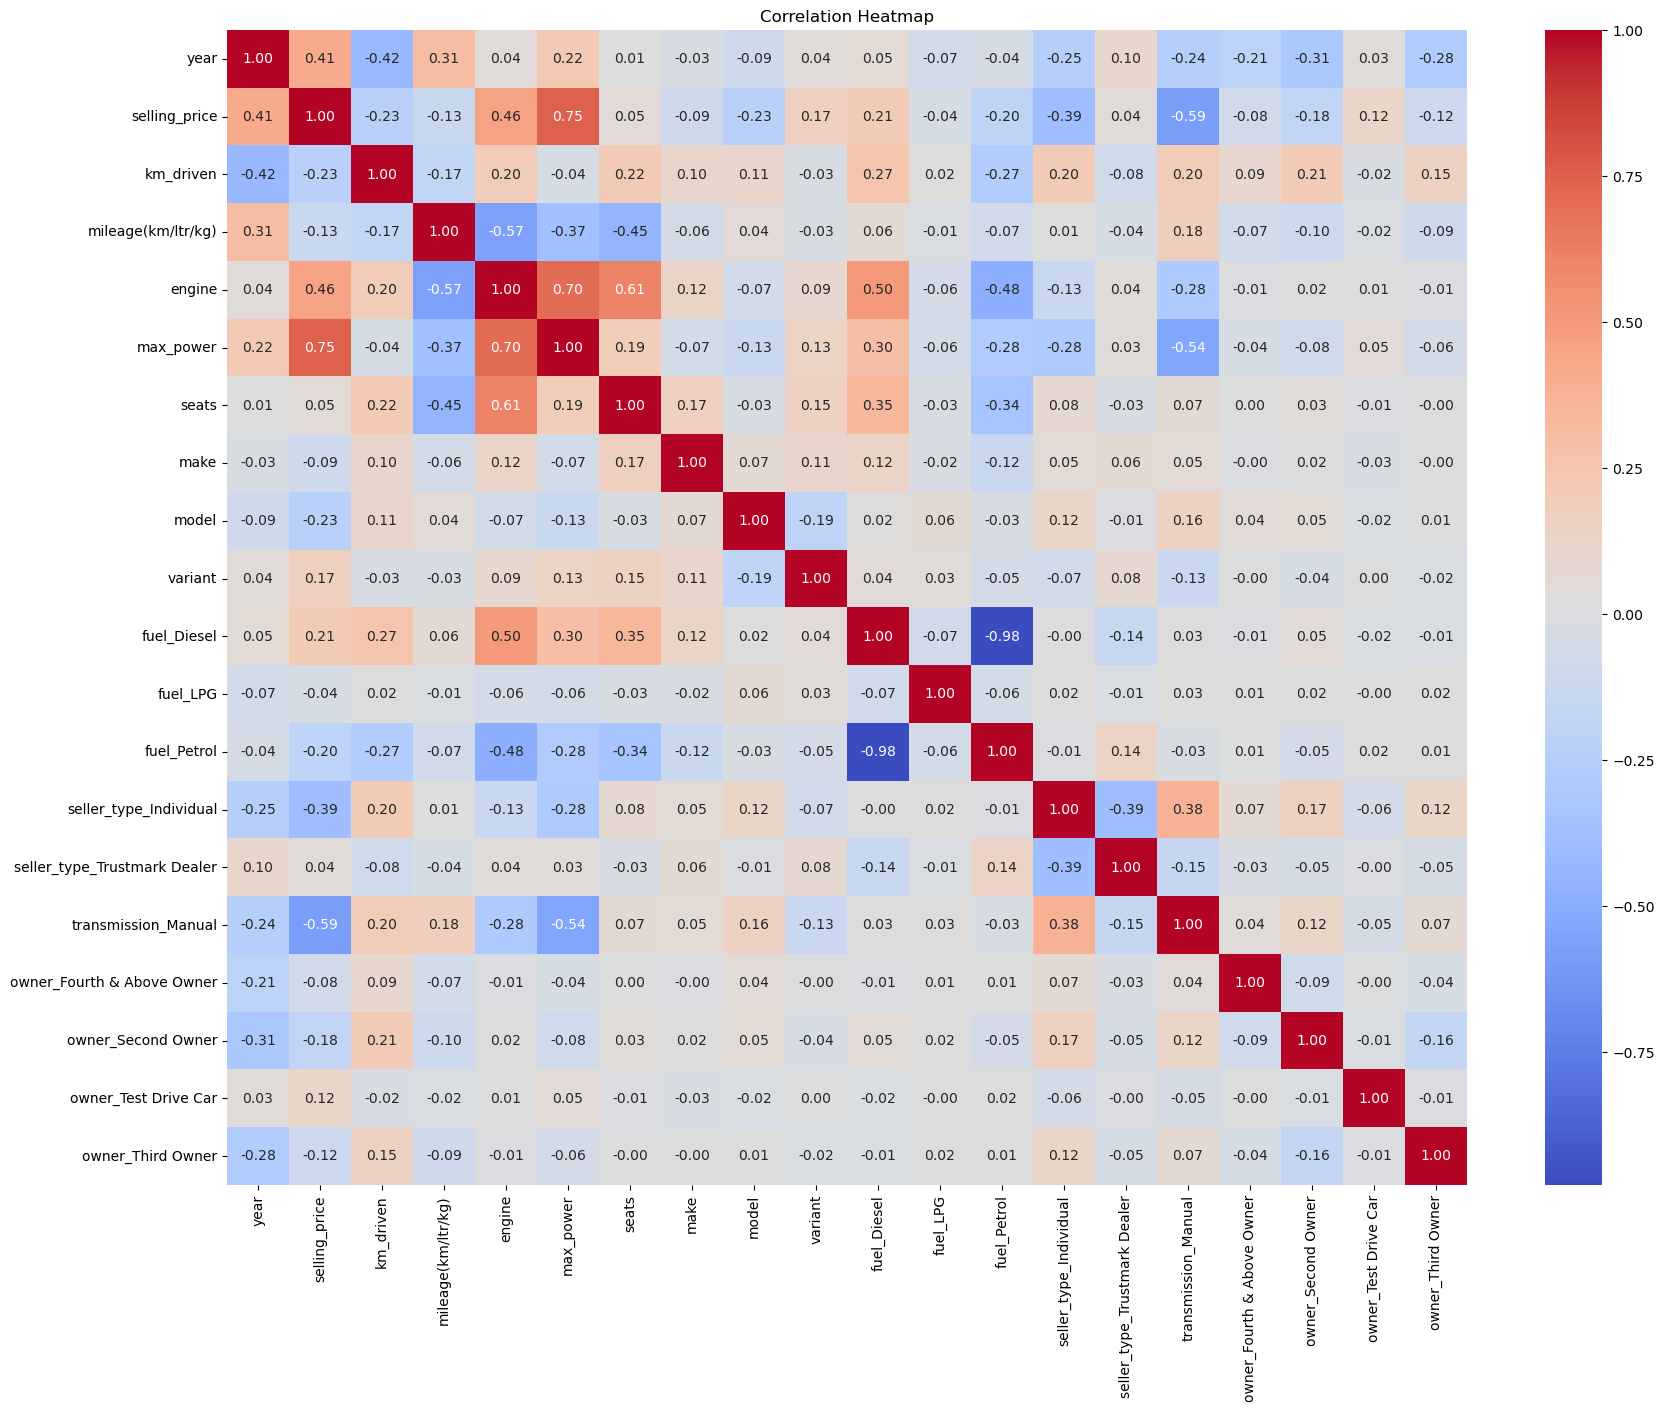

In [21]:
#for the heatmap to observe or see the corelation among the features
cols = [
    'year', 'selling_price', 'km_driven', 'mileage(km/ltr/kg)', 'engine',
    'max_power', 'seats', 'make', 'model', 'variant', 'fuel_Diesel',
    'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
    'seller_type_Trustmark Dealer', 'transmission_Manual',
    'owner_Fourth & Above Owner', 'owner_Second Owner',
    'owner_Test Drive Car', 'owner_Third Owner'
]
a=df[cols].corr()
plt.figure(figsize=(20,15))
sns.heatmap(a,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [22]:
#for train-test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
#linear regression
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [25]:
#Evaluate
lr_prediction=lr_model.predict(x_test)
lr_prediction

array([ 240577.73478761,  858570.20213939,  385987.36446308, ...,
       1124588.44320894,  745312.89753873,  392395.26521772])

In [26]:
#accuracy measurement
import numpy as np
print("Root mean square error (RMSE)",np.sqrt(mean_squared_error(y_test,lr_prediction)))
print("Mean Absolute Error (MEA)",mean_absolute_error(y_test,lr_prediction))
print("R2 score",r2_score(y_test,lr_prediction))

Root mean square error (RMSE) 434608.37659291166
Mean Absolute Error (MEA) 266814.2331436904
R2 score 0.711839931870669


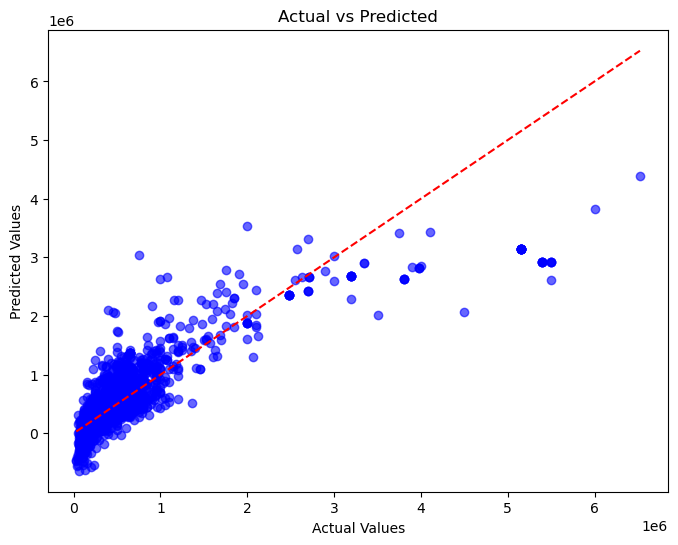

In [27]:
#scatter plot 

plt.figure(figsize=(8,6))
plt.scatter(y_test, lr_prediction, alpha=0.6, color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.show()

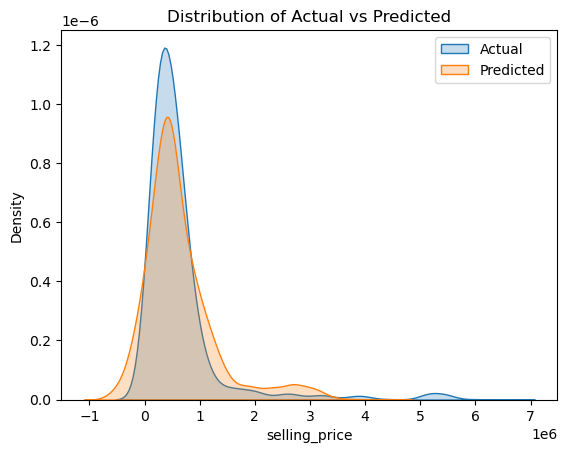

In [28]:
#distribution plots
sns.kdeplot(y_test, label="Actual", fill=True)
sns.kdeplot(lr_prediction, label="Predicted", fill=True)
plt.title("Distribution of Actual vs Predicted")
plt.legend()
plt.show()


In [29]:
#Randomforest
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [30]:
#evaluate
rf_prediction=rf_model.predict(x_test)
print('Root Mean Square Error (RMSE)',np.sqrt(mean_squared_error(y_test,rf_prediction)))
print("Mean Absolute Error (MAE)",mean_absolute_error(y_test,rf_prediction))
print("R2 score",r2_score(y_test,rf_prediction))

Root Mean Square Error (RMSE) 139933.55780465656
Mean Absolute Error (MAE) 64497.41437529111
R2 score 0.9701268262175982


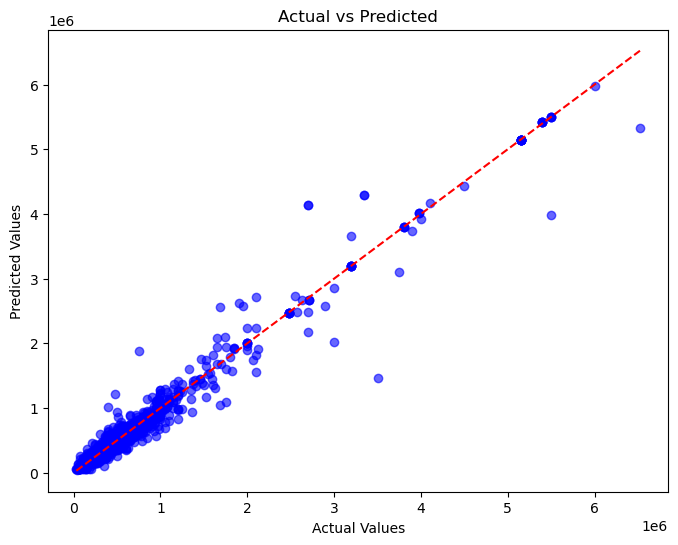

In [31]:
#scatter plot 

plt.figure(figsize=(8,6))
plt.scatter(y_test, rf_prediction, alpha=0.6, color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.show()

In [32]:
# #distribution plots
# sns.kdeplot(y_test, label="Actual", fill=True)
# sns.kdeplot(rf_prediction, label="Predicted", fill=True)
# plt.title("Distribution of Actual vs Predicted")
# plt.legend()
# plt.show()


In [33]:
x.columns

Index(['year', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats', 'make', 'model', 'variant', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [48]:
import pandas as pd

# Your unseen car data 
unseen_car = pd.DataFrame([{
    'year': 2018,
    'km_driven': 45000,
    'mileage(km/ltr/kg)': 19.7,
    'engine': 1248,
    'max_power': 75,
    'seats': 5,
    'make': 'Maruti',
    'model': 'Swift',
    'variant': 'VDI',
    'fuel_Diesel': 1,
    'fuel_LPG': 0,
    'fuel_Petrol': 0,
    'seller_type_Individual': 1,
    'seller_type_Trustmark Dealer': 0,
    'transmission_Manual': 1,
    'owner_Fourth & Above Owner': 0,
    'owner_Second Owner': 0,
    'owner_Test Drive Car': 0,
    'owner_Third Owner': 0
}])

unseen_car_encoded = pd.get_dummies(unseen_car, columns=['make','model','variant'])

unseen_car_encoded = unseen_car_encoded.reindex(columns=x_train.columns, fill_value=0)

predicted_price = rf_model.predict(unseen_car_encoded)

print("Predicted Selling Price:", predicted_price)


Predicted Selling Price: [1638600.]


In [45]:
import pandas as pd

# data fromt the train data
unseen_car = pd.DataFrame([{
    'year': 2014,
    'km_driven': 50000,
    'mileage(km/ltr/kg)': 23.4,
    'engine': 1248,
    'max_power': 74,
    'seats': 5,
    'make': 'Maruti',
    'model': 'Swift',
    'variant': 'VDI',
    'fuel_Diesel': 1,
    'fuel_LPG': 0,
    'fuel_Petrol': 0,
    'seller_type_Individual': 1,
    'seller_type_Trustmark Dealer': 0,
    'transmission_Manual': 1,
    'owner_Fourth & Above Owner': 0,
    'owner_Second Owner': 0,
    'owner_Test Drive Car': 0,
    'owner_Third Owner': 0
}])
# to convert categorical strings into numeric 0/1.
unseen_car_encoded = pd.get_dummies(unseen_car, columns=['make','model','variant'])

# to make sure unseen data has same structure as training data.(realated to the column )
unseen_car_encoded = unseen_car_encoded.reindex(columns=x_train.columns, fill_value=0)

#  Predict selling price using trained RandomForest model
predicted_price = rf_model.predict(unseen_car_encoded)

print("Predicted Selling Price:", predicted_price)


Predicted Selling Price: [628643.33333333]
